In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import timeit
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

from skimage.io import imread
from skimage.color import rgb2gray

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
someTrainingImages = mnist.train.images[:10]

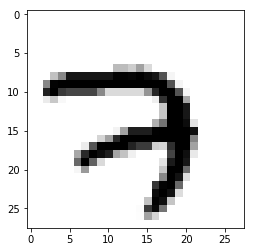

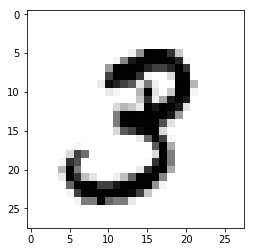

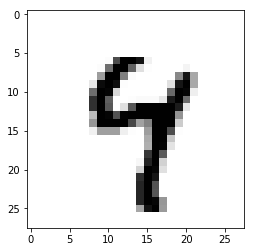

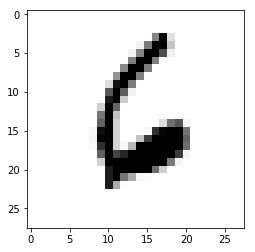

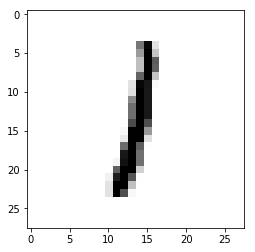

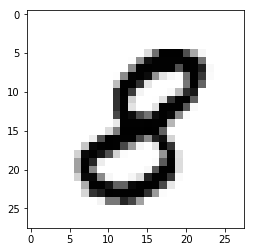

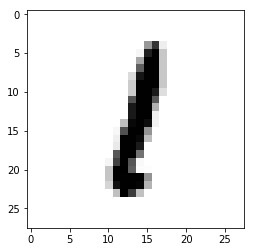

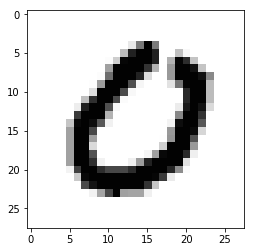

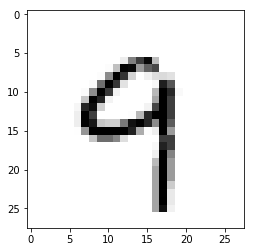

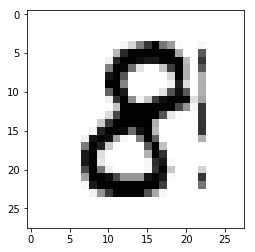

In [4]:
for trainingImage in someTrainingImages:
    plt.figure()
    plt.imshow(trainingImage.reshape((28,28)), cmap=cm.Greys)

# Restore trained model

### Read new image and predict classification

INFO:tensorflow:Restoring parameters from /tmp/models/model_gpu.ckpt
Model restored
Sanity Check that this is a trained model
Labels
[3, 0, 9, 6, 7, 0, 4, 3, 0, 9]
Class selections
[3, 0, 9, 6, 7, 0, 4, 3, 0, 9]
Accuracy = 1.000000


Predict class of new image
Predictions
2 20.808443069458008
1 6.342081069946289
8 1.100399374961853
6 -2.0828261375427246
3 -2.3080358505249023
4 -4.163885116577148
7 -5.382925033569336
5 -10.935585975646973
9 -12.526280403137207
0 -14.22838020324707
Class selected
[2]


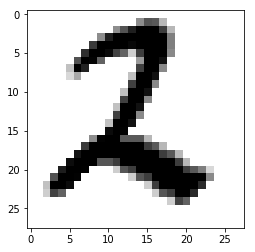

In [23]:
newImage = 1 - np.reshape(rgb2gray(imread("MNIST_data/real_time.png")), (1,784))

tf.reset_default_graph()

results = []

modelDir = '/tmp/models/model_gpu.ckpt'
restorer = tf.train.import_meta_graph(modelDir + '.meta')

defaultGraph = tf.get_default_graph()
y_conv = defaultGraph.get_tensor_by_name("y_conv:0")
x = defaultGraph.get_tensor_by_name("x:0")
keep_prob = defaultGraph.get_tensor_by_name("keep_prob:0")
accuracy = defaultGraph.get_tensor_by_name("accuracy:0")
y_ = defaultGraph.get_tensor_by_name("y_:0")
    

with tf.Session() as sess:

    restorer.restore(sess, modelDir)
    print("Model restored")

    # Test model using new tensor
    batchSize = 10
    batch = mnist.train.next_batch(batchSize)    
    batch_results = y_conv.eval(feed_dict={x: batch[0], keep_prob: 1.0})
    
    
    results = y_conv.eval(feed_dict={x: newImage, keep_prob: 1.0})
    predictionAccuracy = accuracy.eval(feed_dict={x: batch[0],
                                          y_: batch[1],
                                              keep_prob: 1.0})


    
print("Sanity Check that this is a trained model")
print("Labels")
print(list(map(np.argmax, batch[1])))
print("Class selections")
print(list(map(np.argmax, batch_results)))
print("Accuracy = %f" % predictionAccuracy)
print("=" *20)

print("\n\nPredict class of new image")
plt.figure()
plt.imshow(newImage.reshape((28,28)), cmap=cm.Greys)
print("Predictions")
sortedClassProbabilities = list(zip(range(10), results.tolist()[0]))
sortedClassProbabilities.sort(key=lambda x: x[1], reverse=True)
for numClass, prob in sortedClassProbabilities:
    print(numClass, prob)
    
print("=" * 20)
print("Class selected")
print(list(map(np.argmax, results)))